In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import pandas as pd

In [2]:

class read_data_totorch():
   def __init__(self,name):
      self.df = pd.read_csv(f"../saved/data_wavevel_{name}.txt",sep=' ',header=None,skiprows=1)
      # 转换为numpy数组
      self.wavevel_name = name
      data_array = self.df.to_numpy()
      field_data = data_array[:,0:-1]
      self.field_data = np.array(field_data, dtype=float)
      nrows = field_data.shape[0]
      time_steps = nrows// (4*126) 
      self.frames =field_data.reshape(time_steps,4,126,254)
      self.frames =np.array(self.frames, dtype=float)
      
   def init_ani(self):
         # 初始化图像和色标
         self.fig, self.ax = plt.subplots(1, 2, figsize=(12, 6))
         self.images = [self.ax[i].imshow(self.frames[0, i+2, :, :], vmin=-1, vmax=1, cmap='bwr') for i in range(2)]
         self.cbar = [self.fig.colorbar(self.images[i], ax=self.ax[i], fraction=0.03, pad=0.02) for i in range(2)]
         titles = ['Vorticity', 'Pressure']
   def update_ani(self,t):
      for img, data in zip(self.images, [2, 3]):
        img.set_data(self.frames[t, data, :, :])
        img.axes.set_title(f"wave_vel{self.wavevel_name}step_{t}", fontsize=20)
        plt.tight_layout()
      
   def save_ani(self,frames_number=100):
      # 设置动画
      ani = FuncAnimation(self.fig, self.update_ani, frames=frames_number, init_func=self.init_ani, repeat=False)
      ani.save(f'fish_wa_vel_{self.wavevel_name}_video.mp4', writer='ffmpeg', fps=100)
   def save_torch(self):
      
      tensor_field_data = torch.from_numpy(self.frames)
      torch.save(tensor_field_data, f'wa_vel_{self.wavevel_name}_field_data.pt')



## saved is the wave _veloity in the flex naca

In [3]:
import glob

# 假设你要搜索的目录是 'some_directory/'
txt_files = glob.glob('../saved/*.txt')
txt_files

['../saved/data_wavevel_0.8812772.txt',
 '../saved/data_wavevel_1.0179029.txt',
 '../saved/data_wavevel_1.1155775.txt',
 '../saved/data_wavevel_0.9640618.txt',
 '../saved/data_wavevel_1.0499381.txt',
 '../saved/data_wavevel_0.95269346.txt',
 '../saved/data_wavevel_0.83174807.txt',
 '../saved/data_wavevel_1.0790246.txt',
 '../saved/data_wavevel_0.868375.txt',
 '../saved/data_wavevel_1.1469098.txt',
 '../saved/data_wavevel_1.0038967.txt',
 '../saved/data_wavevel_1.0702132.txt',
 '../saved/data_wavevel_1.0536888.txt',
 '../saved/data_wavevel_0.9029075.txt',
 '../saved/data_wavevel_0.94187725.txt',
 '../saved/data_wavevel_0.988978.txt',
 '../saved/data_wavevel_1.1012712.txt',
 '../saved/data_wavevel_0.99588525.txt',
 '../saved/data_wavevel_1.1165324.txt',
 '../saved/data_wavevel_0.9345614.txt',
 '../saved/data_wavevel_0.9259794.txt',
 '../saved/data_wavevel_0.91854423.txt',
 '../saved/data_wavevel_0.9132766.txt',
 '../saved/data_wavevel_0.8181137.txt',
 '../saved/data_wavevel_1.1880846.txt

In [4]:
import re
# 提取wavevel数值
wavevel_values = [float(re.search(r'data_wavevel_([0-9.]+)\.txt', filename).group(1)) for filename in txt_files]

len(wavevel_values)

385

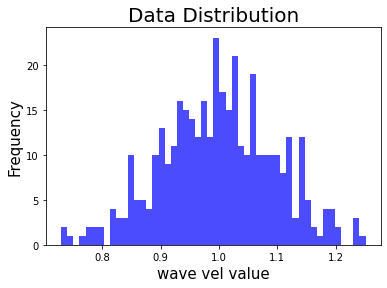

In [5]:
# 绘制直方图
plt.hist(wavevel_values, bins=50, alpha=0.7, color='blue')  # bins 参数控制直方图的条形数，alpha 控制透明度

# 添加一些标签和标题
plt.title('Data Distribution', fontsize=20)
plt.xlabel('wave vel value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.savefig('wavevel_distribution_data.png',dpi=200)
# 显示图表
plt.show()

In [6]:
FILENAME = "Fish_wave_vel"

In [7]:
B = len(wavevel_values)
C,T, H, W = 1, 200,126, 254
accumulated_vor = np.zeros((B,C,T,H, W), dtype=float)
accumulated_vor.shape

(385, 1, 200, 126, 254)

In [8]:
B = len(wavevel_values)
C,T, H, W = 1, 40,80, 160
accumulated_vor = np.zeros((B,C,T,H, W), dtype=float)
accumulated_vor.shape

(385, 1, 40, 80, 160)

In [9]:
for index,i in  enumerate(wavevel_values):
    print(index)
    numpy_data = read_data_totorch(i).frames[1:200:5,2:4,30:110,40:200].astype(np.float32) #4  是压力场



    #we just want to get vorticity
    vor_reshaped =  np.expand_dims(numpy_data, axis=0)  # 在第二个轴（维度）位置增加一个新的轴 # This should make vor's shape (200, 1, 126, 254)

    print(vor_reshaped.shape)
    accumulated_vor[index,...]= vor_reshaped

    

0


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [43]:
# 将列表转换为NumPy数组
wavevel_values_array = np.array(wavevel_values)

# 改变数组的形状为 (10, 1)
wavevel_values_para = wavevel_values_array.reshape(len(wavevel_values_array), 1)
wavevel_values_para

array([[0.8812772 ],
       [1.0179029 ],
       [1.1155775 ],
       [0.9640618 ],
       [1.0499381 ],
       [0.95269346],
       [0.83174807],
       [1.0790246 ],
       [0.868375  ],
       [1.1469098 ],
       [1.0038967 ],
       [1.0702132 ],
       [1.0536888 ],
       [0.9029075 ],
       [0.94187725],
       [0.988978  ],
       [1.1012712 ],
       [0.99588525],
       [1.1165324 ],
       [0.9345614 ],
       [0.9259794 ],
       [0.91854423],
       [0.9132766 ],
       [0.8181137 ],
       [1.1880846 ],
       [1.0857253 ],
       [1.0278591 ],
       [0.8429564 ],
       [1.1522627 ],
       [1.1169012 ],
       [1.1203152 ],
       [0.8003622 ],
       [1.1376364 ],
       [0.908767  ],
       [0.95312315],
       [1.1430438 ],
       [1.1103072 ],
       [0.9008049 ],
       [1.0060706 ],
       [0.8918972 ],
       [1.0120752 ],
       [0.93626386],
       [0.84678984],
       [0.848284  ],
       [0.9501285 ],
       [1.1842505 ],
       [0.9992398 ],
       [0.934

In [44]:
np.savez(f"{FILENAME}_data.npz", x=accumulated_vor,params=wavevel_values_para)